**DataSet**  :   [Sales](https://drive.google.com/drive/u/2/folders/13dpzjmBgQN-m0t9rw7K46fbHW-tJNqjM)
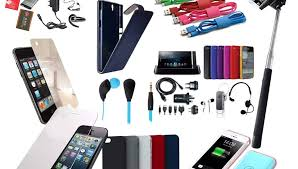</img>

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


>## Merging 12 month Files Into One file and Read 

In [5]:
files= [file  for file in os.listdir('./Sales_data')]
 
Months=pd.DataFrame()
for file in files:
    data=pd.read_csv('./Sales_data/' + file)
    Months=pd.concat([Months,data])
Months.to_csv('Sales.csv',index=False)

In [6]:
data=pd.read_csv("Sales.csv")
# data

>## Data Cleaning


In [7]:
# Check the null values from dataset
nan_values = data[data.isna().any(axis=1)]


# Drop all NaN values into rows and columns 

data = data.dropna(how='all')



In [8]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### Get rid of text in order date column

In [10]:
data=data[ data['Order ID'].str[0:2]!='Or']

In [11]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each']= pd.to_numeric(data['Price Each'])

#### Convert Object into Number

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [13]:
data['Price Each'] = (data['Price Each'].round().astype('int'))
# data.head()

>## Data Wrangling

### Add month column

In [14]:
data['Month']= data['Order Date'].str[0:2]
data['Month']= data['Month'].astype('int32')


In [15]:
data['Date']= data['Order Date'].str[3:5]


### Add Sales column

In [16]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

In [17]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Date,Sales
0,176558,USB-C Charging Cable,2,12,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,24
2,176559,Bose SoundSport Headphones,1,100,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,07,100
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600
4,176560,Wired Headphones,1,12,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,12
5,176561,Wired Headphones,1,12,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,12


### Add a City column

In [18]:
data['city']= data['Purchase Address'].apply(lambda x: x.split(',')[1])

### Add a  State Column

In [19]:
data['State'] = data['Purchase Address'].apply(lambda x : x.split(',')[2])

># Insight Report
---------------------------

### Quantity Order In Each City

In [20]:
data.groupby(['city'])['Quantity Ordered'].sum()

city
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int64

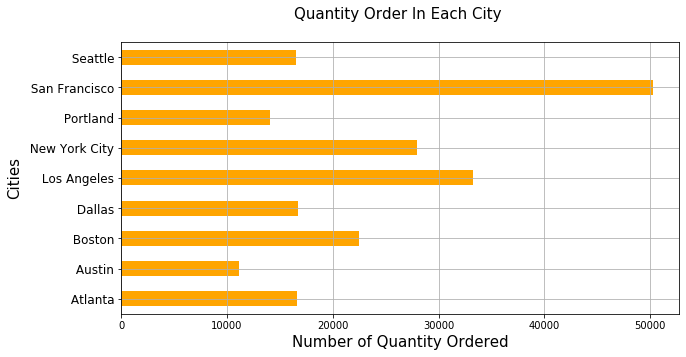

In [95]:
plt.figure(figsize=(10,5))
data.groupby(['city'])['Quantity Ordered'].sum().plot(kind='barh' , color='orange')
plt.title("Quantity Order In Each City \n",fontsize=15)
plt.ylabel("Cities",fontsize=15)
plt.xlabel("Number of Quantity Ordered",fontsize=15)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=12) 
plt.grid()



### Quantity Order In Each City

In [22]:
data.groupby(['State'])['Quantity Ordered'].sum()

State
 CA 90001    33289
 CA 94016    50239
 GA 30301    16602
 MA 02215    22528
 ME 04101     2750
 NY 10001    27932
 OR 97035    11303
 TX 73301    11153
 TX 75001    16730
 WA 98101    16553
Name: Quantity Ordered, dtype: int64

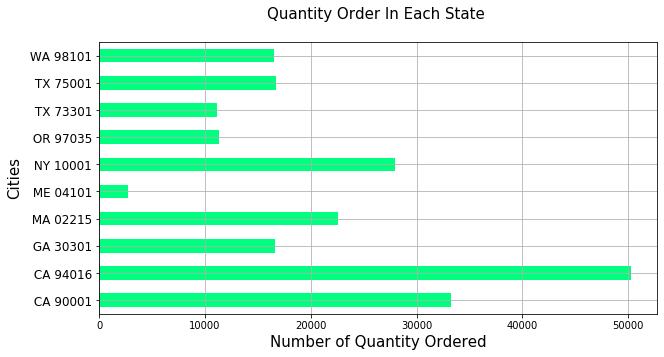

In [96]:
plt.figure(figsize=(10,5))
data.groupby(['State'])['Quantity Ordered'].sum().plot(kind='barh',color='springgreen')
plt.title("Quantity Order In Each State \n",fontsize=15)
plt.ylabel("Cities",fontsize=15)
plt.xlabel("Number of Quantity Ordered",fontsize=15)
plt.rc('xtick', labelsize=10) 
plt.grid()


### Quantity Orderd of each  Sold products 

In [24]:
data.groupby(['Product'])['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

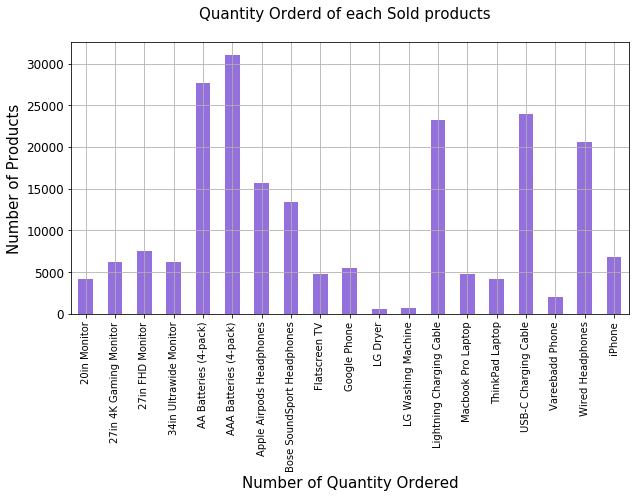

In [97]:
plt.figure(figsize=(10,5))
data.groupby(['Product'])['Quantity Ordered'].sum().plot(kind='bar' , color='mediumpurple')
plt.title("Quantity Orderd of each Sold products  \n",fontsize=15)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Number of Quantity Ordered",fontsize=15)
plt.rc('xtick', labelsize=10) 
plt.grid()


### Quantity number of Products

In [26]:
Products=data['Product'].value_counts().head()

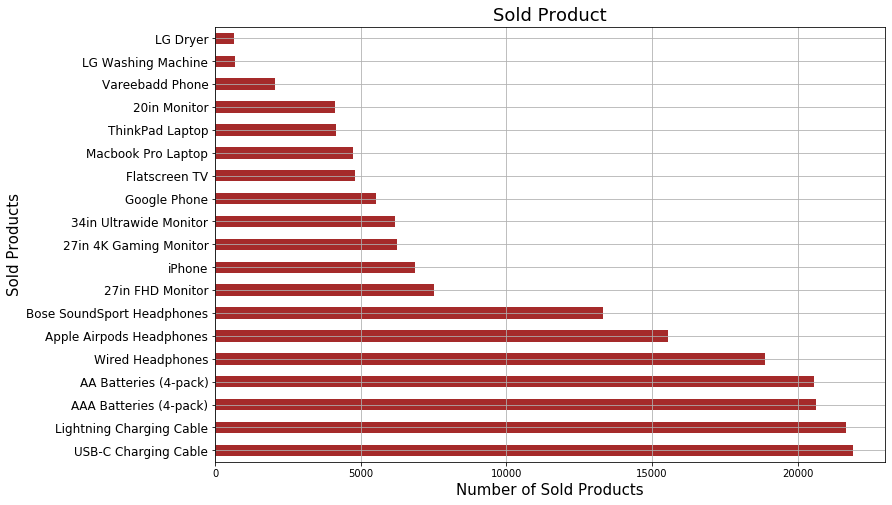

In [98]:
plt.figure(figsize=(12,8))
data['Product'].value_counts().plot(kind='barh' , color='brown')
plt.title("Sold Product",fontsize=18)
plt.xlabel("Number of Sold Products",fontsize=15)
plt.ylabel("Sold Products",fontsize=15)
plt.rc('xtick', labelsize=10) 
plt.grid()
plt.show()

### Number of Sales in Each City

In [28]:
data.groupby(['city'])['Sales'].sum()

city
 Atlanta          2796112
 Austin           1819987
 Boston           3662478
 Dallas           2768598
 Los Angeles      5453807
 New York City    4665339
 Portland         2321019
 San Francisco    8264049
 Seattle          2748361
Name: Sales, dtype: int64

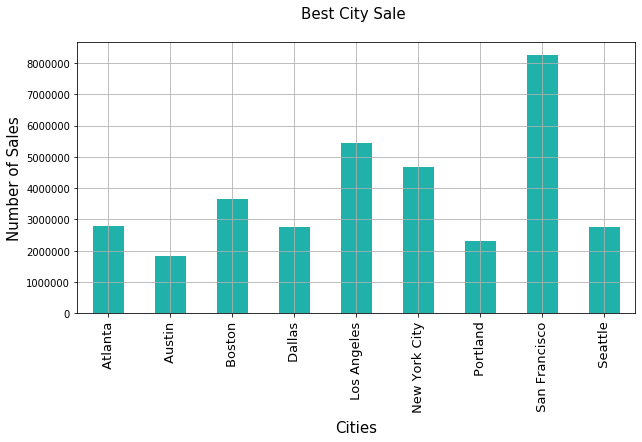

In [123]:
plt.figure(figsize=(10,5))
data.groupby(['city'])['Sales'].sum().plot(kind='bar' , color='lightseagreen')
plt.title("Best City Sale \n",fontsize=15)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Number of Sales",fontsize=15)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=10) 


plt.grid()
plt.show()

### Best Month Sales

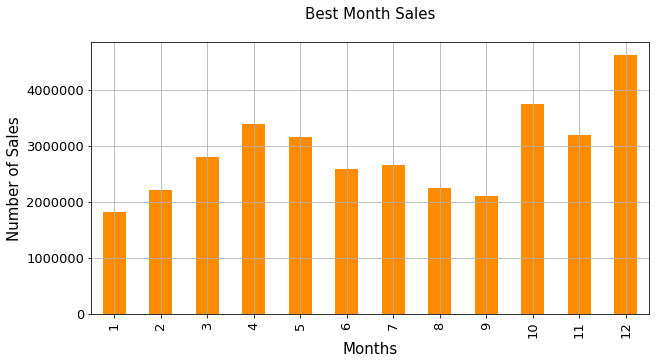

In [120]:
plt.figure(figsize=(10,5))
data.groupby(['Month'])['Sales'].sum().plot(kind='bar' , color='darkorange')
plt.title("Best Month Sales\n",fontsize=15)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Number of Sales",fontsize=15)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.grid()
plt.show()


### Product Sold in According to Hours

In [36]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [37]:
data['Hours'] = data['Order Date'].dt.hour
data['Mint'] = data['Order Date'].dt.minute

In [38]:
hours = [hour for hour , df in data.groupby('Hours')]

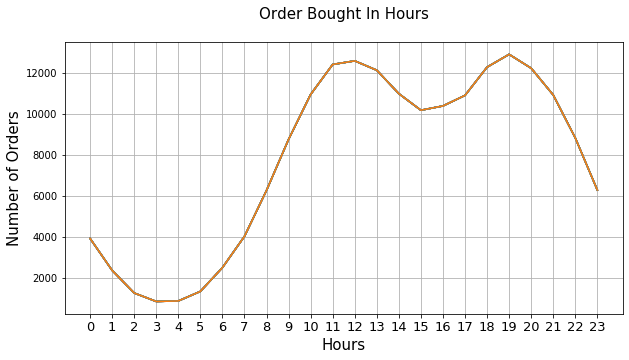

In [124]:
plt.figure(figsize=(10,5))

plt.plot(hours,data.groupby(['Hours']).count())
plt.xticks(hours)
plt.title("Order Bought In Hours\n",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Number of Orders",fontsize=15)
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=12) 


plt.grid()

plt.show()

### Each Price of Product

In [40]:
Price=data.groupby(['Product'])['Price Each'].mean()

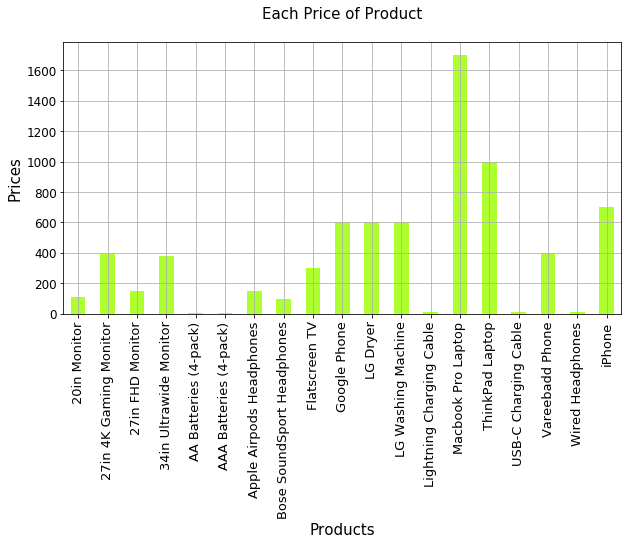

In [125]:
plt.figure(figsize=(10,5))

data.groupby(['Product']).mean()['Price Each'].plot(kind='bar' , color='greenyellow')

plt.title("Each Price of Product\n",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.ylabel("Prices",fontsize=15)
plt.rc('xtick', labelsize=13) 
plt.rc('xtick', labelsize=12) 


plt.grid()

plt.show()